In [1]:
%pylab inline
from app.analysis import Quote
foreign = Quote.screen_funds('Equities', 'Foreign', max_expense=.8) + ['VT', 'ACWI', 'ACWV']
reit = Quote.screen_funds('Alternatives', min_assets=1, max_expense=.6)
commodity = Quote.screen_funds('Commodities', min_assets=.6, max_expense=1)
print(len(foreign), len(reit), len(commodity))
quote = Quote(foreign + reit + commodity, 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
87 12 10
from 2019-03-11 to 2019-09-06 - 109


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

50


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
PSLV,122,0.170688,0.467843,0.352117,18.884896,8.066758
SLV,122,0.162631,0.491140,0.319011,17.397362,8.015263
SGOL,122,0.133232,0.342897,0.371190,16.285787,3.906185
IAU,122,0.132661,0.344215,0.368108,16.303466,3.946330
GLD,122,0.132140,0.342040,0.368927,16.099477,3.986548
XLRE,122,0.101433,0.338245,0.282282,14.099409,4.835459
ICF,122,0.086032,0.338682,0.236446,11.985806,4.991450
EWL,122,0.084630,0.272550,0.288674,12.808963,3.698805
RSX,122,0.084407,0.454293,0.172696,12.591508,10.986739


evicted EWC 0.882 -0.098
evicted DWX 0.899 -0.010
evicted BBJP 0.832 -0.183
evicted VNQI 0.897 -0.087
evicted RWX 0.749 0.019
evicted EWT 0.697 -0.031
evicted ACWV 0.753 0.061
evicted EWA 0.789 -0.292
evicted RSX 0.698 -0.055
evicted PSLV 0.625 0.019
evicted EWL 0.748 0.043
evicted XLRE 0.227 0.097
retry backlogs ['VEA', 'IEV', 'RWR', 'SCHH', 'EFA', 'EWQ', 'SPDW', 'VGK', 'SCHF', 'EZU', 'GLD', 'BBEU', 'IDEV', 'USRT', 'VNQ', 'VT', 'RWO', 'ICF', 'IEFA', 'IEUR', 'ACWI', 'HEFA', 'GSIE', 'FEZ', 'EFAV', 'VIGI', 'IYR', 'SGOL', 'IPAC', 'REET', 'DBEF', 'EFG', 'EWJ', 'HEDJ', 'HEZU', 'SLV'] at 0.905/-0.51 - 0.477
evicted EFAV 0.900 0.032
evicted EWJ 0.891 -0.173
evicted SLV 0.598 -0.036
evicted ICF 0.248 0.025
retry backlogs ['IEV', 'VEA', 'VGK', 'VNQ', 'GLD', 'RWR', 'EFA', 'EWQ', 'SPDW', 'SCHF', 'BBEU', 'SCHH', 'SGOL', 'USRT', 'IDEV', 'IEFA', 'HEFA', 'IEUR', 'EZU', 'FEZ', 'GSIE', 'HEDJ', 'VT', 'ACWI', 'RWO', 'IYR', 'HEZU', 'VIGI', 'IPAC', 'REET', 'DBEF', 'EFG'] at 0.910/-0.52 - 0.477
evicted IYR 

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.100635,0.197959,-0.270995,-0.042460,0.072178,0.213559,0.798377,0.478294,12.763351,1.708988
IAU,122.0,0.132661,0.344215,-0.559464,-0.081188,0.112176,0.280055,1.178272,0.368108,16.303466,3.946330
DBEU,122.0,0.052059,0.336941,-1.182825,-0.171098,0.058671,0.284402,0.670666,0.136838,7.562440,6.493938


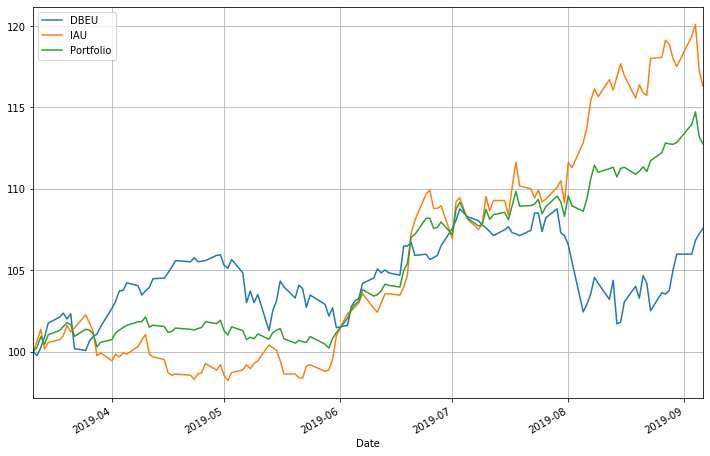

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['DBEU', 'GLD'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote.setup_mask(['DBEU', 'GLD'])
quote.graph({'DBEU': 0.41, 'GLD': 0.59})